In [10]:
import rasterio
from rasterio.transform import from_origin

### Create a Raster From Scratch

In [30]:
elev = np.arange(1, 37, dtype=np.uint8).reshape(6, 6)
elev

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [31]:
v = [
  1, 0, 1, 2, 2, 2, 
  0, 2, 0, 0, 2, 1, 
  0, 2, 2, 0, 0, 2, 
  0, 0, 1, 1, 1, 1, 
  1, 1, 1, 2, 1, 1, 
  2, 1, 2, 2, 0, 2
]
grain = np.array(v, dtype=np.uint8).reshape(6, 6)
grain

array([[1, 0, 1, 2, 2, 2],
       [0, 2, 0, 0, 2, 1],
       [0, 2, 2, 0, 0, 2],
       [0, 0, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1],
       [2, 1, 2, 2, 0, 2]], dtype=uint8)

In [32]:
new_transform = rasterio.transform.from_origin(
    west=-1.5, 
    north=1.5, 
    xsize=0.5, 
    ysize=0.5
)
new_transform

Affine(0.5, 0.0, -1.5,
       0.0, -0.5, 1.5)

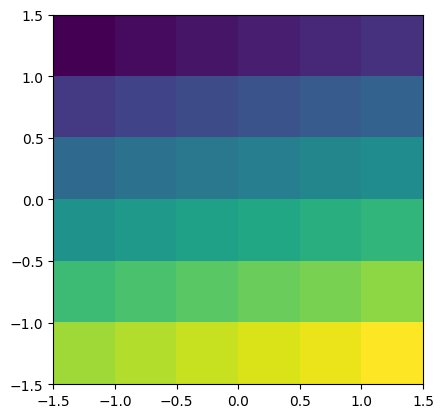

In [33]:
# A raster is an array plus the referencing information, here the transform
rasterio.plot.show(elev, transform=new_transform);

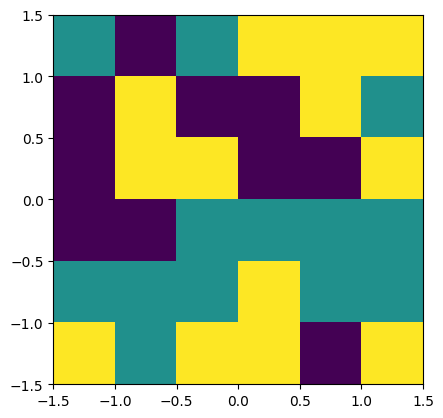

In [34]:
rasterio.plot.show(grain, transform=new_transform);

In [37]:
# write rasters as tif files
grain_ds = rasterio.open(
    'output/grain.tif', 'w', 
    driver='GTiff',
    height=grain.shape[0],
    width=grain.shape[1],
    count=1,
    dtype=grain.dtype,
    crs=4326,
    transform=new_transform)

grain_ds.write(grain, 1)
grain_ds.close()

elev_ds = rasterio.open(
    'output/elev.tif', 'w', 
    driver='GTiff',
    height=elev.shape[0],
    width=elev.shape[1],
    count=1,
    dtype=elev.dtype,
    crs=4326,
    transform=new_transform)

elev_ds.write(elev, 1)
elev_ds.close()

### Multi-Band Raster Example

In [38]:
# Define raster parameters
rows, cols = 10, 10  
transform = from_origin(0, 10, 1.0, -1.0)
nodata = 0  # No data value

# Create a three-band raster object
data_band_1 = np.random.randint(1, 256, size=(rows, cols), dtype='uint8')
data_band_2 = np.random.randint(1, 3, size=(rows, cols), dtype='uint8')
data_band_3 = np.random.randint(1, 12, size=(rows, cols), dtype='uint8')
data = np.stack([data_band_1, data_band_2, data_band_3], axis=0)

output_file_path = 'data/example_3band_raster.tif'

# Write the raster to a file
with rasterio.open(
    output_file_path,
    'w',
    driver='GTiff', 
    height=rows,
    width=cols,
    count=3,  # Number of bands
    dtype=data.dtype,
    nodata=nodata,
    transform=transform,
    crs = 4326 # arbitrarily chosen in this case
) as dst:
     for i in range(1, 4):  # Write each band to the file
        dst.write(data[i-1], i)

print(f"Raster saved to {output_file_path}")

Raster saved to data/example_3band_raster.tif


In [39]:
src = rasterio.open('data/example_3band_raster.tif')
src

<open DatasetReader name='data/example_3band_raster.tif' mode='r'>

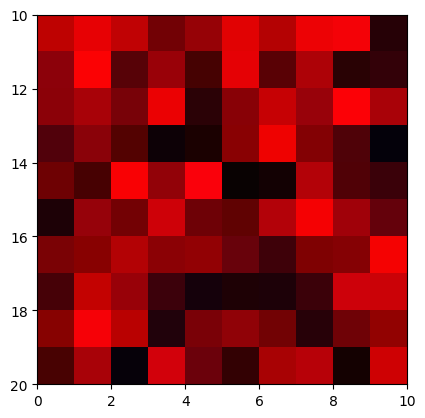

In [41]:
rasterio.plot.show(src);

In [42]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 10,
 'height': 10,
 'count': 3,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 10.0)}

In [28]:
src.read(3)

array([[ 5, 10,  4,  3,  3, 10,  7, 10, 11,  9],
       [10,  4,  6,  5,  4,  6, 10,  1,  1,  5],
       [10,  7,  8, 10,  7,  2,  4,  8,  3,  2],
       [11, 11,  7,  6, 10,  8,  7,  4,  8,  7],
       [ 6,  6,  3, 10,  7,  5, 11,  8, 10,  1],
       [ 9,  7,  7,  8,  1,  9,  9,  8,  1,  4],
       [ 1,  7,  4,  1,  4,  1,  8,  8,  6, 11],
       [ 8, 10,  2,  8,  3, 11,  4,  9,  4,  3],
       [ 2,  6,  4,  2,  7,  7,  7,  1,  8,  8],
       [ 9,  2, 11,  9,  5,  9,  3, 11, 11, 10]], dtype=uint8)